In [81]:
from sql_functions import get_dataframe
import pandas as pd
import Capstone_functions as sf

In [84]:
schema = "bgg_data"
main = "ml_boardgame_stats"
subdomain = "subdomain"
unique_subdomain = "unique_subdomain"


df_main = get_dataframe(f"SELECT * FROM {schema}.{main}")
df_marketplace = sf.avg_price_from_marketplace()
df_sub = get_dataframe(f"SELECT * FROM {schema}.{subdomain}")
df_u_sub = get_dataframe(f"SELECT * FROM {schema}.{unique_subdomain}")

In [85]:
df_main.nunique()

id               28545
yearpublished      205
min_players         12
max_players         51
min_playtime        89
max_playtime       131
min_age             18
average          19975
user_rated        1977
num_owned         2813
trading            370
wanting            386
wishing           1028
numcomments       1040
numweights         424
averageweight     2482
dtype: int64

In [86]:
df_sub.nunique()

id              26390
subdomain_id        8
dtype: int64

In [145]:
# df_log_reg = pd.merge(df_main, df_marketplace, how="inner", on="id")
# df_log_reg = pd.merge(df_log_reg, df_stats, how="inner", on="id")

df_3 = pd.merge(df_main, df_marketplace, how="inner", on="id")
df_3 = pd.merge(df_3, df_sub, how="left", on="id")
df_3 = pd.merge(df_3, df_u_sub, how="left", on="subdomain_id")

df_3.head(50)

,id,yearpublished,min_players,max_players,min_playtime,max_playtime,min_age,average,user_rated,num_owned,trading,wanting,wishing,numcomments,numweights,averageweight,avg_price,subdomain_id,subdomain_name
0,98472,2011.0,3.0,7.0,60.0,60.0,10,5.54551,167,477,34,7,71,55,14,2.2143,9.55,5499.0,Family
1,98472,2011.0,3.0,7.0,60.0,60.0,10,5.54551,167,477,34,7,71,55,14,2.2143,9.55,5497.0,Strategy
2,98529,2011.0,2.0,4.0,15.0,15.0,6,6.04040,248,427,24,18,42,118,22,1.0909,32.48,4665.0,Children's
3,98529,2011.0,2.0,4.0,15.0,15.0,6,6.04040,248,427,24,18,42,118,22,1.0909,32.48,5499.0,Family
4,51203,2009.0,3.0,5.0,30.0,30.0,8,4.90000,14,29,2,1,4,4,0,NaN,24.67,4665.0,Children's
5,51250,2009.0,2.0,2.0,15.0,15.0,10,6.93672,64,98,2,9,39,21,4,1.7500,30.00,4666.0,Abstract
6,51374,2009.0,3.0,NaN,NaN,NaN,8,4.63750,20,21,1,0,0,10,2,1.0000,10.30,NaN,NaN
7,173003,2016.0,2.0,2.0,10.0,10.0,7,6.04537,164,359,19,5,35,50,3,1.3333,19.63,NaN,NaN
8,173005,2017.0,2.0,5.0,30.0,60.0,8,5.69029,103,233,25,4,19,57,9,1.2222,24.24,NaN,NaN
9,173074,2015.0,1.0,5.0,20.0,20.0,7,5.85268,390,1121,39,17,107,105,14,1.2143,21.07,4665.0,Children's


In [146]:
df_3 = df_3[df_3["subdomain_id"].notna()]

In [107]:
subdomain = pd.get_dummies(df_3["subdomain_id"], drop_first=True)

In [108]:
subdomain

,4665.0,4666.0,4667.0,5496.0,5497.0,5498.0,5499.0
0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
17655,0,0,0,0,0,0,1
17658,0,0,0,0,1,0,0
17659,0,0,0,1,0,0,0
17668,0,0,0,0,0,0,1


In [147]:
df_3["sales"] = df_3["avg_price"] * df_3["num_owned"]

In [148]:
df_3.head(10)

,id,yearpublished,min_players,max_players,min_playtime,max_playtime,min_age,average,user_rated,num_owned,trading,wanting,wishing,numcomments,numweights,averageweight,avg_price,subdomain_id,subdomain_name,sales
0,98472,2011.0,3.0,7.0,60.0,60.0,10,5.54551,167,477,34,7,71,55,14,2.2143,9.55,5499.0,Family,4555.35
1,98472,2011.0,3.0,7.0,60.0,60.0,10,5.54551,167,477,34,7,71,55,14,2.2143,9.55,5497.0,Strategy,4555.35
2,98529,2011.0,2.0,4.0,15.0,15.0,6,6.04040,248,427,24,18,42,118,22,1.0909,32.48,4665.0,Children's,13868.96
3,98529,2011.0,2.0,4.0,15.0,15.0,6,6.04040,248,427,24,18,42,118,22,1.0909,32.48,5499.0,Family,13868.96
4,51203,2009.0,3.0,5.0,30.0,30.0,8,4.90000,14,29,2,1,4,4,0,NaN,24.67,4665.0,Children's,715.43
5,51250,2009.0,2.0,2.0,15.0,15.0,10,6.93672,64,98,2,9,39,21,4,1.7500,30.00,4666.0,Abstract,2940.00
9,173074,2015.0,1.0,5.0,20.0,20.0,7,5.85268,390,1121,39,17,107,105,14,1.2143,21.07,4665.0,Children's,23619.47
10,173092,2015.0,1.0,4.0,15.0,15.0,8,6.57741,645,976,27,27,97,139,30,1.1667,18.63,5499.0,Family,18182.88
11,173096,2017.0,2.0,4.0,30.0,30.0,8,7.09191,834,1994,80,92,641,186,20,1.7500,31.89,5499.0,Family,63588.66
13,173101,2015.0,2.0,4.0,40.0,75.0,10,7.17174,2700,3945,162,170,704,577,87,2.5747,35.24,5497.0,Strategy,139021.80


In [6]:
#df_log_reg["target_reached"] = pd.cut(df_log_reg["sales"], bins= [0, sales_target, float('Inf')], labels= [0, 1])

In [7]:
#df_log_reg["target_reached"] = df_log_reg["target_reached"].fillna(0)

In [149]:
df_3 = df_3.drop([#"id", 
                            "yearpublished",  
                            "user_rated", 
                            "num_owned", 
                            "trading", 
                            "wanting", 
                            "wishing", 
                            "numcomments", 
                            "numweights", 
                            "average",  
                            "averageweight"], axis=1)

In [150]:
df_3.query("id == 356033")

,id,min_players,max_players,min_playtime,max_playtime,min_age,avg_price,subdomain_id,subdomain_name,sales
2575,356033,1.0,6.0,45.0,60.0,14,50.1,5499.0,Family,201201.6
2576,356033,1.0,6.0,45.0,60.0,14,50.1,5497.0,Strategy,201201.6


In [151]:
df_4 = df_3.groupby('id').agg({"subdomain_name":"unique"})

In [152]:
df_4

,subdomain_name
id,
1,[Strategy ]
3,[Strategy ]
4,[Strategy ]
7,[Abstract ]
9,[Strategy ]
...,...
354886,[Family ]
355346,[Wargames]
356033,"[Family , Strategy ]"


In [153]:
df_5 = pd.merge(df_3, df_4, how="inner", on="id")
df_5

,id,min_players,max_players,min_playtime,max_playtime,min_age,avg_price,subdomain_id,subdomain_name_x,sales,subdomain_name_y
0,98472,3.0,7.0,60.0,60.0,10,9.55,5499.0,Family,4555.35,"[Family , Strategy ]"
1,98472,3.0,7.0,60.0,60.0,10,9.55,5497.0,Strategy,4555.35,"[Family , Strategy ]"
2,98529,2.0,4.0,15.0,15.0,6,32.48,4665.0,Children's,13868.96,"[Children's , Family ]"
3,98529,2.0,4.0,15.0,15.0,6,32.48,5499.0,Family,13868.96,"[Children's , Family ]"
4,51203,3.0,5.0,30.0,30.0,8,24.67,4665.0,Children's,715.43,[Children's ]
...,...,...,...,...,...,...,...,...,...,...,...
8459,218333,2.0,4.0,10.0,20.0,5,24.93,5499.0,Family,205148.97,"[Children's , Family ]"
8460,218376,2.0,4.0,60.0,90.0,13,108.15,5497.0,Strategy,101661.00,"[Strategy , Thematic ]"
8461,218376,2.0,4.0,60.0,90.0,13,108.15,5496.0,Thematic,101661.00,"[Strategy , Thematic ]"
8462,298060,2.0,4.0,15.0,30.0,14,14.48,5499.0,Family,30132.88,[Family ]


In [121]:
df_5.columns

Index(['id', 'min_players', 'max_players', 'min_playtime', 'max_playtime',
       'min_age', 'avg_price', 'subdomain_id', 'subdomain_name_x', 'sales',
       'subdomain_name_y'],
      dtype='object')

In [154]:
df_5 = df_5.drop(["subdomain_name_x", "subdomain_id"], axis=1)
df_5

,id,min_players,max_players,min_playtime,max_playtime,min_age,avg_price,sales,subdomain_name_y
0,98472,3.0,7.0,60.0,60.0,10,9.55,4555.35,"[Family , Strategy ]"
1,98472,3.0,7.0,60.0,60.0,10,9.55,4555.35,"[Family , Strategy ]"
2,98529,2.0,4.0,15.0,15.0,6,32.48,13868.96,"[Children's , Family ]"
3,98529,2.0,4.0,15.0,15.0,6,32.48,13868.96,"[Children's , Family ]"
4,51203,3.0,5.0,30.0,30.0,8,24.67,715.43,[Children's ]
...,...,...,...,...,...,...,...,...,...
8459,218333,2.0,4.0,10.0,20.0,5,24.93,205148.97,"[Children's , Family ]"
8460,218376,2.0,4.0,60.0,90.0,13,108.15,101661.00,"[Strategy , Thematic ]"
8461,218376,2.0,4.0,60.0,90.0,13,108.15,101661.00,"[Strategy , Thematic ]"
8462,298060,2.0,4.0,15.0,30.0,14,14.48,30132.88,[Family ]


In [155]:
df_5 = df_5.drop_duplicates("id")
df_5

,id,min_players,max_players,min_playtime,max_playtime,min_age,avg_price,sales,subdomain_name_y
0,98472,3.0,7.0,60.0,60.0,10,9.55,4555.35,"[Family , Strategy ]"
2,98529,2.0,4.0,15.0,15.0,6,32.48,13868.96,"[Children's , Family ]"
4,51203,3.0,5.0,30.0,30.0,8,24.67,715.43,[Children's ]
5,51250,2.0,2.0,15.0,15.0,10,30.00,2940.00,[Abstract ]
6,173074,1.0,5.0,20.0,20.0,7,21.07,23619.47,[Children's ]
...,...,...,...,...,...,...,...,...,...
8456,218311,1.0,6.0,30.0,90.0,12,13.61,53841.16,"[Party , Thematic ]"
8458,218333,2.0,4.0,10.0,20.0,5,24.93,205148.97,"[Children's , Family ]"
8460,218376,2.0,4.0,60.0,90.0,13,108.15,101661.00,"[Strategy , Thematic ]"
8462,298060,2.0,4.0,15.0,30.0,14,14.48,30132.88,[Family ]


In [130]:
df_5["subdomain_name"] = [",".join(map(str,l))for l in df_5["subdomain_name_y"]]
df_5

,id,min_players,max_players,min_playtime,max_playtime,min_age,avg_price,sales,subdomain_name_y,subdomain_name
0,98472,3.0,7.0,60.0,60.0,10,9.55,4555.35,"[Family , Strategy ]","Family ,Strategy"
2,98529,2.0,4.0,15.0,15.0,6,32.48,13868.96,"[Children's , Family ]","Children's ,Family"
4,51203,3.0,5.0,30.0,30.0,8,24.67,715.43,[Children's ],Children's
5,51250,2.0,2.0,15.0,15.0,10,30.00,2940.00,[Abstract ],Abstract
6,173074,1.0,5.0,20.0,20.0,7,21.07,23619.47,[Children's ],Children's
...,...,...,...,...,...,...,...,...,...,...
8456,218311,1.0,6.0,30.0,90.0,12,13.61,53841.16,"[Party , Thematic ]","Party ,Thematic"
8458,218333,2.0,4.0,10.0,20.0,5,24.93,205148.97,"[Children's , Family ]","Children's ,Family"
8460,218376,2.0,4.0,60.0,90.0,13,108.15,101661.00,"[Strategy , Thematic ]","Strategy ,Thematic"
8462,298060,2.0,4.0,15.0,30.0,14,14.48,30132.88,[Family ],Family


In [160]:
subdomain_dummy = pd.get_dummies(df_5.subdomain_name_y.apply(pd.Series).stack(), drop_first=True).sum(level=0)
subdomain_dummy

,Children's,Customizable,Family,Party,Strategy,Thematic,Wargames
0,0,0,1,0,1,0,0
2,1,0,1,0,0,0,0
4,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
8456,0,0,0,1,0,1,0
8458,1,0,1,0,0,0,0
8460,0,0,0,0,1,1,0
8462,0,0,1,0,0,0,0


In [162]:
df_6 = pd.concat([subdomain_dummy, df_5], axis=1)
df_6 = df_6.drop(["id", "subdomain_name_y"], axis=1)
df_6 = df_6.drop(["max_playtime"], axis=1)
df_6

,Children's,Customizable,Family,Party,Strategy,Thematic,Wargames,min_players,max_players,min_playtime,min_age,avg_price,sales
0,0,0,1,0,1,0,0,3.0,7.0,60.0,10,9.55,4555.35
2,1,0,1,0,0,0,0,2.0,4.0,15.0,6,32.48,13868.96
4,1,0,0,0,0,0,0,3.0,5.0,30.0,8,24.67,715.43
5,0,0,0,0,0,0,0,2.0,2.0,15.0,10,30.00,2940.00
6,1,0,0,0,0,0,0,1.0,5.0,20.0,7,21.07,23619.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8456,0,0,0,1,0,1,0,1.0,6.0,30.0,12,13.61,53841.16
8458,1,0,1,0,0,0,0,2.0,4.0,10.0,5,24.93,205148.97
8460,0,0,0,0,1,1,0,2.0,4.0,60.0,13,108.15,101661.00
8462,0,0,1,0,0,0,0,2.0,4.0,15.0,14,14.48,30132.88


<AxesSubplot:>

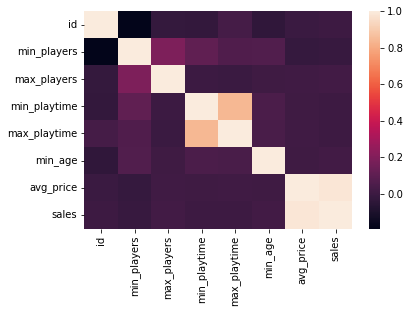

In [164]:
import seaborn as sns
sns.heatmap(df_5.corr())

In [165]:
df_6["min_players"] = df_6["min_players"].fillna(0)
df_6["min_playtime"] = df_6["min_playtime"].fillna(0)
df_6 = df_6[df_6["max_players"].notna()]
df_6.isnull().sum()

Children's       0
Customizable     0
Family           0
Party            0
Strategy         0
Thematic         0
Wargames         0
min_players      0
max_players      0
min_playtime     0
min_age          0
avg_price        0
sales            0
dtype: int64

In [175]:
df_6

,Children's,Customizable,Family,Party,Strategy,Thematic,Wargames,min_players,max_players,min_playtime,min_age,avg_price,sales
0,0,0,1,0,1,0,0,3.0,7.0,60.0,10,9.55,4555.35
2,1,0,1,0,0,0,0,2.0,4.0,15.0,6,32.48,13868.96
4,1,0,0,0,0,0,0,3.0,5.0,30.0,8,24.67,715.43
5,0,0,0,0,0,0,0,2.0,2.0,15.0,10,30.00,2940.00
6,1,0,0,0,0,0,0,1.0,5.0,20.0,7,21.07,23619.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8456,0,0,0,1,0,1,0,1.0,6.0,30.0,12,13.61,53841.16
8458,1,0,1,0,0,0,0,2.0,4.0,10.0,5,24.93,205148.97
8460,0,0,0,0,1,1,0,2.0,4.0,60.0,13,108.15,101661.00
8462,0,0,1,0,0,0,0,2.0,4.0,15.0,14,14.48,30132.88


In [166]:
col = df_6.columns.to_list()
col

["Children's ",
 'Customizable ',
 'Family ',
 'Party ',
 'Strategy ',
 'Thematic ',
 'Wargames',
 'min_players',
 'max_players',
 'min_playtime',
 'min_age',
 'avg_price',
 'sales']

In [176]:
chi = [df_6["Children's "].to_list()]
cus = [df_6["Customizable "].to_list()]
fam = [df_6["Family "].to_list()]
par = [df_6["Party "].to_list()]
strat = [df_6["Strategy "].to_list()]
the = [df_6["Thematic "].to_list()]
war = [df_6["Wargames"].to_list()]
min_players = [df_6["min_players"].to_list()]
max_players = [df_6["max_players"].to_list()]
min_playtime = [df_6["min_playtime"].to_list()]
min_age = [df_6["min_age"].to_list()]
avg_price = [df_6["avg_price"].to_list()]
sales = [df_6["sales"].to_list()]



In [177]:
dic = {
col[0]: chi,
col[1]: cus,
col[2]: fam,
col[3]: par,
col[4]: strat,
col[5]: the,
col[6]: war,
col[7]: min_players,
col[8]: max_players,
col[9]: min_playtime,
col[10]: min_age,
col[11]: avg_price,
col[12]: sales
}

In [178]:
df2 = pd.DataFrame(dic)
df2

,Children's,Customizable,Family,Party,Strategy,Thematic,Wargames,min_players,max_players,min_playtime,min_age,avg_price,sales
0,"[0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[3.0, 2.0, 3.0, 2.0, 1.0, 1.0, 2.0, 2.0, 2.0, ...","[7.0, 4.0, 5.0, 2.0, 5.0, 4.0, 4.0, 4.0, 10.0,...","[60.0, 15.0, 30.0, 15.0, 20.0, 15.0, 30.0, 40....","[10, 6, 8, 10, 7, 8, 8, 10, 10, 6, 12, 12, 0, ...","[9.55, 32.48, 24.67, 30.0, 21.07, 18.63, 31.89...","[4555.35, 13868.96, 715.4300000000001, 2940.0,..."


In [172]:
df2.to_csv("/Users/jannikduda/neuefische/Daily-Lama-Capstone/data/bgg_tableau4.csv")